# Primary Type과 시간대 간 관련성 — 카이제곱 검정

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from decimal import Decimal

# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/chicago dataset/crime_data_final.csv')

In [ ]:
print(df.isna().sum())

Unnamed: 0                 0
ID                         0
Case Number                7
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description    1990
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                       0
Community Area           495
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
Hour                       0
Month                      0
TimePeriod                 0
범죄한글                       0
dtype: int64


In [ ]:
type_translation = {
    'ARSON': '방화',
    'ASSAULT': '폭행위협',
    'BATTERY': '폭행',
    'BURGLARY': '주거침입',
    'CONCEALED CARRY LICENSE VIOLATION': '총기소지허가 위반',
    'CRIM SEXUAL ASSAULT': '강간',
    'CRIMINAL DAMAGE': '재산손괴',
    'CRIMINAL TRESPASS': '무단침입',
    'DECEPTIVE PRACTICE': '사기',
    'DOMESTIC VIOLENCE': '가정폭력',
    'GAMBLING': '도박',
    'HOMICIDE': '살인',
    'HUMAN TRAFFICKING': '인신매매',
    'INTERFERENCE WITH PUBLIC OFFICER': '공무집행방해',
    'INTIMIDATION': '협박',
    'KIDNAPPING': '유괴',
    'LIQUOR LAW VIOLATION': '주류법 위반',
    'MOTOR VEHICLE THEFT': '차량절도',
    'NARCOTICS': '마약',
    'NON - CRIMINAL': '비범죄',
    'NON-CRIMINAL': '비범죄',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': '비범죄(특정대상)',
    'OBSCENITY': '외설행위',
    'OFFENSE INVOLVING CHILDREN': '아동범죄',
    'OTHER NARCOTIC VIOLATION': '기타 마약 범죄',
    'OTHER OFFENSE': '기타범죄',
    'PROSTITUTION': '성매매',
    'PUBLIC INDECENCY': '공공외설',
    'PUBLIC PEACE VIOLATION': '공공질서위반',
    'RITUALISM': '의식적 범죄',
    'ROBBERY': '강도',
    'SEX OFFENSE': '성범죄',
    'STALKING': '스토킹',
    'THEFT': '절도',
    'WEAPONS VIOLATION': '무기소지 위반'
}

In [ ]:
# 날짜 파싱 및 시간대 분류
df['Hour'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.hour

def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6:
        return '새벽'
    elif 6 <= hour < 12:
        return '오전'
    elif 12 <= hour < 18:
        return '오후'
    else:
        return '저녁'

df['TimePeriod'] = df['Hour'].apply(get_time_period)

# 범죄유형을 한글로 변환하여 교차표 생성
ct_year = pd.crosstab(df['Primary Type'].map(type_translation).fillna('기타'), df['Year'])

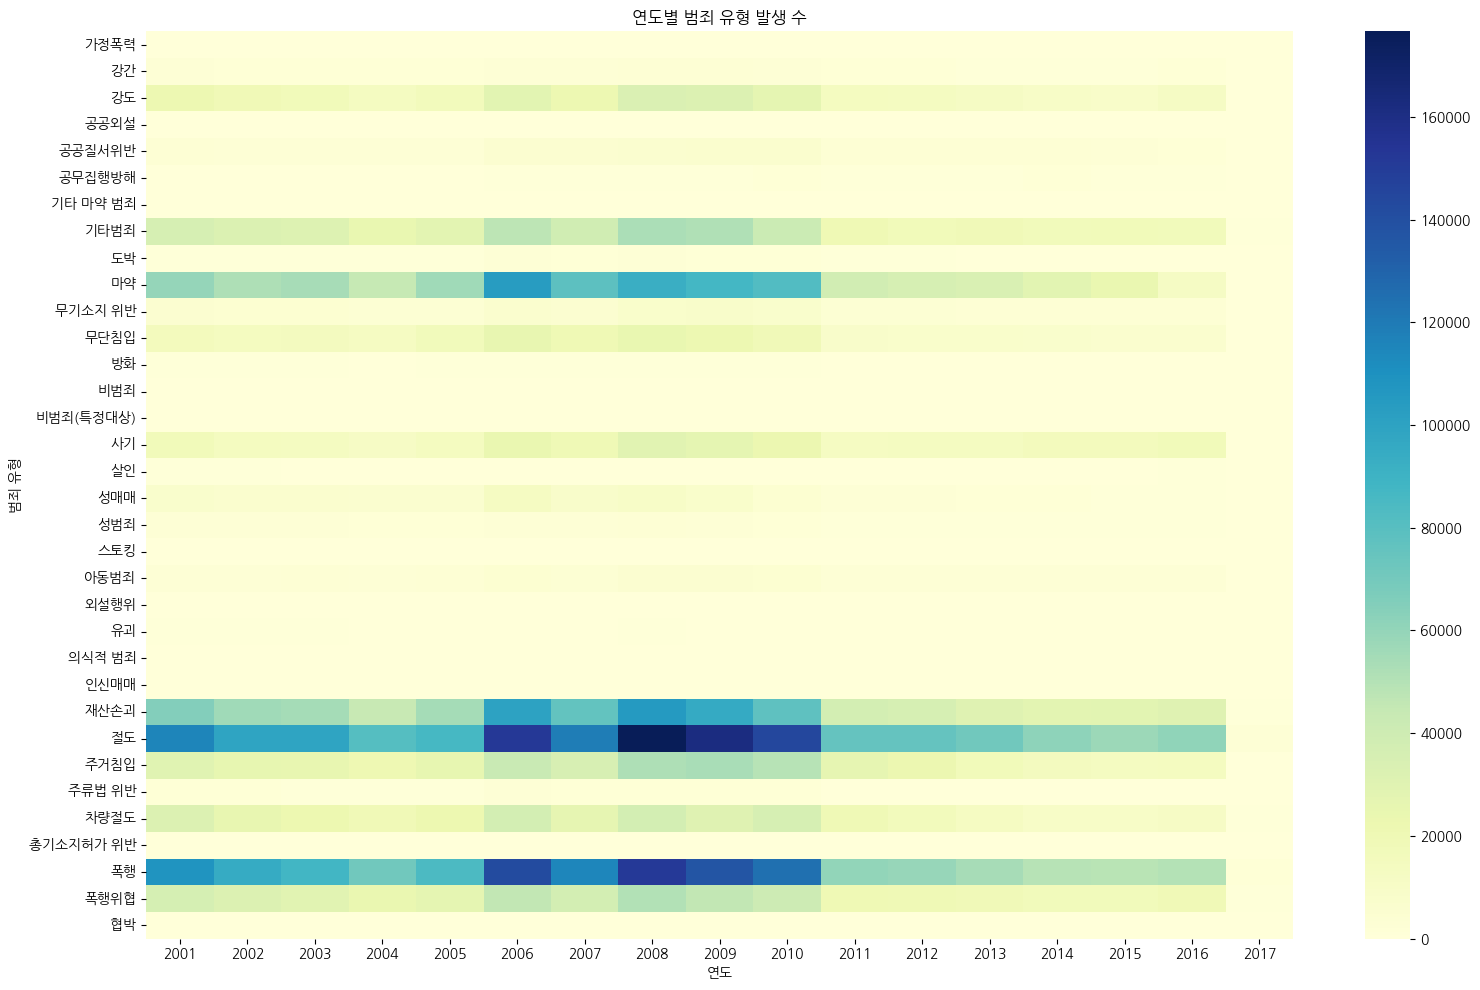

In [ ]:
# 시각화
plt.figure(figsize=(16, 10))
sns.heatmap(ct_year, cmap='YlGnBu')
plt.title('연도별 범죄 유형 발생 수')
plt.xlabel('연도')
plt.ylabel('범죄 유형')
plt.tight_layout()
plt.show()

In [ ]:
# 날짜 형식 지정해 경고 방지
df['Hour'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.hour

# 시간대 분류 함수
def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6:
        return '새벽'
    elif 6 <= hour < 12:
        return '오전'
    elif 12 <= hour < 18:
        return '오후'
    else:
        return '저녁'

# 시간대 컬럼 생성
df['TimePeriod'] = df['Hour'].apply(get_time_period)

# ✅ 1. Top 10 Primary Type vs 시간대
top10 = df['Primary Type'].value_counts().nlargest(10).index
df['Primary Type Top10'] = df['Primary Type'].apply(lambda x: x if x in top10 else '기타')

# 교차표 생성
ct_top10 = pd.crosstab(df['Primary Type Top10'], df['TimePeriod'])

# 카이제곱 검정
chi2_t10, p_t10, dof_t10, _ = chi2_contingency(ct_top10)
print("[Top 10 Primary Type vs 시간대]")
print(f"카이제곱 통계량: {chi2_t10:.2f}, p-value: {p_t10:.4f}, 자유도: {dof_t10}")

alpha = 0.05
if p_t10 < alpha:
    print("→ 귀무가설 기각: 범죄 유형과 시간대는 관련 있음")
else:
    print("→ 귀무가설 채택: 범죄 유형과 시간대는 관련 없음")

[Top 10 Primary Type vs 시간대]
카이제곱 통계량: 338939.21, p-value: 0.0000, 자유도: 30
→ 귀무가설 기각: 범죄 유형과 시간대는 관련 있음


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 1. 시간대 파생
def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6: return '새벽'
    elif 6 <= hour < 12: return '오전'
    elif 12 <= hour < 18: return '오후'
    else: return '저녁'

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['TimePeriod'] = df['Hour'].apply(get_time_period)

# 2. Primary Type → 한글 매핑
type_translation = {
    'ARSON': '방화', 'ASSAULT': '폭행위협', 'BATTERY': '폭행',
    'BURGLARY': '주거침입', 'CRIM SEXUAL ASSAULT': '강간',
    'CRIMINAL DAMAGE': '재산손괴', 'CRIMINAL TRESPASS': '무단침입',
    'DECEPTIVE PRACTICE': '사기', 'DOMESTIC VIOLENCE': '가정폭력',
    'GAMBLING': '도박', 'HOMICIDE': '살인', 'HUMAN TRAFFICKING': '인신매매',
    'INTERFERENCE WITH PUBLIC OFFICER': '공무집행방해', 'INTIMIDATION': '협박',
    'KIDNAPPING': '유괴', 'LIQUOR LAW VIOLATION': '주류법 위반',
    'MOTOR VEHICLE THEFT': '차량절도', 'NARCOTICS': '마약',
    'NON - CRIMINAL': '비범죄', 'NON-CRIMINAL': '비범죄',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': '비범죄(특정대상)', 'OBSCENITY': '외설행위',
    'OFFENSE INVOLVING CHILDREN': '아동범죄', 'OTHER NARCOTIC VIOLATION': '기타 마약 범죄',
    'OTHER OFFENSE': '기타범죄', 'PROSTITUTION': '성매매', 'PUBLIC INDECENCY': '공공외설',
    'PUBLIC PEACE VIOLATION': '공공질서위반', 'RITUALISM': '의식적 범죄',
    'ROBBERY': '강도', 'SEX OFFENSE': '성범죄', 'STALKING': '스토킹',
    'THEFT': '절도', 'WEAPONS VIOLATION': '무기소지 위반'
}
df['범죄한글'] = df['Primary Type'].map(type_translation).fillna('기타')

# 3. 결측값 제거
df_clean = df.dropna(subset=['TimePeriod', '범죄한글'])

# 4. 교차표 생성
ct = pd.crosstab(df_clean['범죄한글'], df_clean['TimePeriod'])

# 5. 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(ct)

print("[카이제곱 검정] 범죄유형 vs 시간대")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")

# 6. Cramér's V 계산
n = ct.sum().sum()
min_dim = min(ct.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(f"Cramér's V (효과 크기): {cramers_v:.4f}")


[카이제곱 검정] 범죄유형 vs 시간대
카이제곱 통계량: 399507.49
p-value: 0.0000
자유도: 99
Cramér's V (효과 크기): 0.1295


In [ ]:
# 한글화
!pip install koreanize-matplotlib
import koreanize_matplotlib

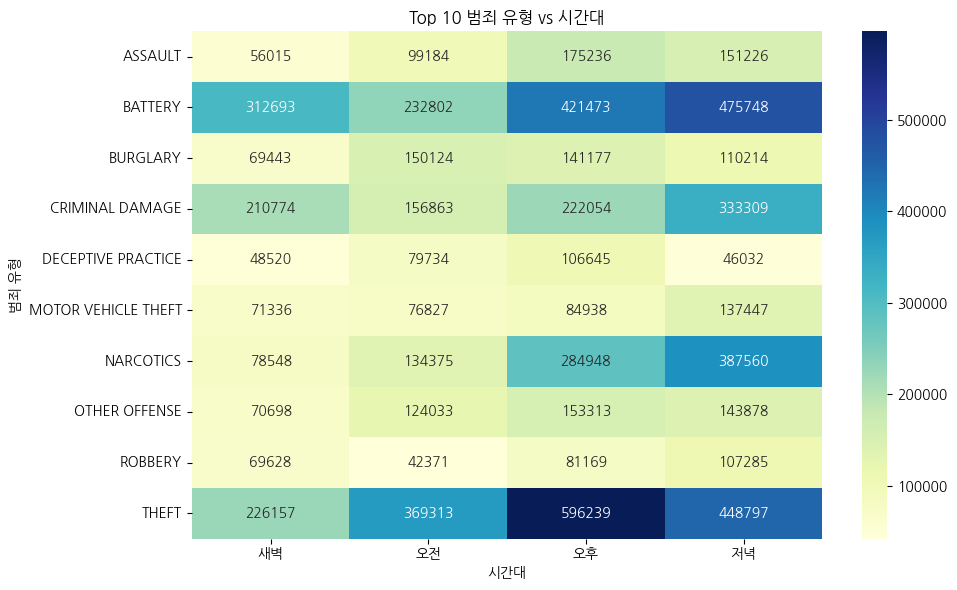

In [ ]:
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(ct_top10, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top 10 범죄 유형 vs 시간대')
plt.xlabel('시간대')
plt.ylabel('범죄 유형')
plt.tight_layout()
plt.show()

In [ ]:
def group_primary_type(x):
    if x in ['THEFT', 'BURGLARY', 'ROBBERY']:
        return '재산범죄'
    elif x in ['BATTERY', 'ASSAULT', 'SEX OFFENSE', 'DOMESTIC VIOLENCE']:
        return '폭력범죄'
    elif x in ['NARCOTICS', 'LIQUOR LAW VIOLATION', 'OTHER NARCOTIC VIOLATION']:
        return '약물범죄'
    elif x in ['CRIMINAL DAMAGE', 'CRIMINAL TRESPASS', 'ARSON']:
        return '공공질서'
    else:
        return '기타'

df['범죄그룹'] = df['Primary Type'].apply(group_primary_type)

# 교차표 생성
ct_group = pd.crosstab(df['범죄그룹'], df['TimePeriod'])

# 카이제곱 검정
chi2_grp, p_grp, dof_grp, _ = chi2_contingency(ct_group)
print("\n[범죄 그룹 vs 시간대]")
print(f"카이제곱 통계량: {chi2_grp:.2f}, p-value: {p_grp:.4f}, 자유도: {dof_grp}")


[범죄 그룹 vs 시간대]
카이제곱 통계량: 177387.94, p-value: 0.0000, 자유도: 12


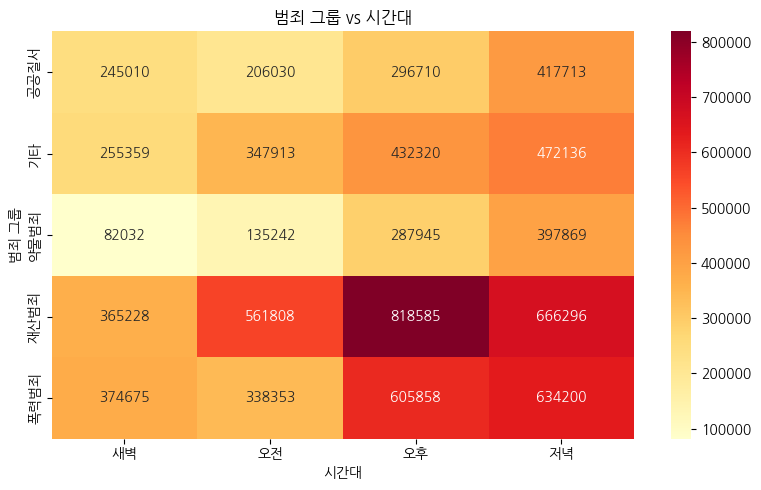

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
sns.heatmap(ct_group, annot=True, fmt='d', cmap='YlOrRd')
plt.title('범죄 그룹 vs 시간대')
plt.xlabel('시간대')
plt.ylabel('범죄 그룹')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# 범죄유형을 한글로 매핑
df['범죄한글'] = df['Primary Type'].map(type_translation).fillna('기타')

# 교차표 생성
ct = pd.crosstab(df['범죄한글'], df['Year'])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(ct)
print("[범죄유형 vs 연도] 카이제곱 검정 결과")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")

# 결과 해석
alpha = 0.05
if p < alpha:
    print("→ 귀무가설 기각: 연도에 따라 범죄유형의 분포는 유의미하게 다름")
else:
    print("→ 귀무가설 채택: 연도와 범죄유형은 독립적 (관련 없음)")

[범죄유형 vs 연도] 카이제곱 검정 결과
카이제곱 통계량: 97781.78
p-value: 0.0000
자유도: 528
→ 귀무가설 기각: 연도에 따라 범죄유형의 분포는 유의미하게 다름


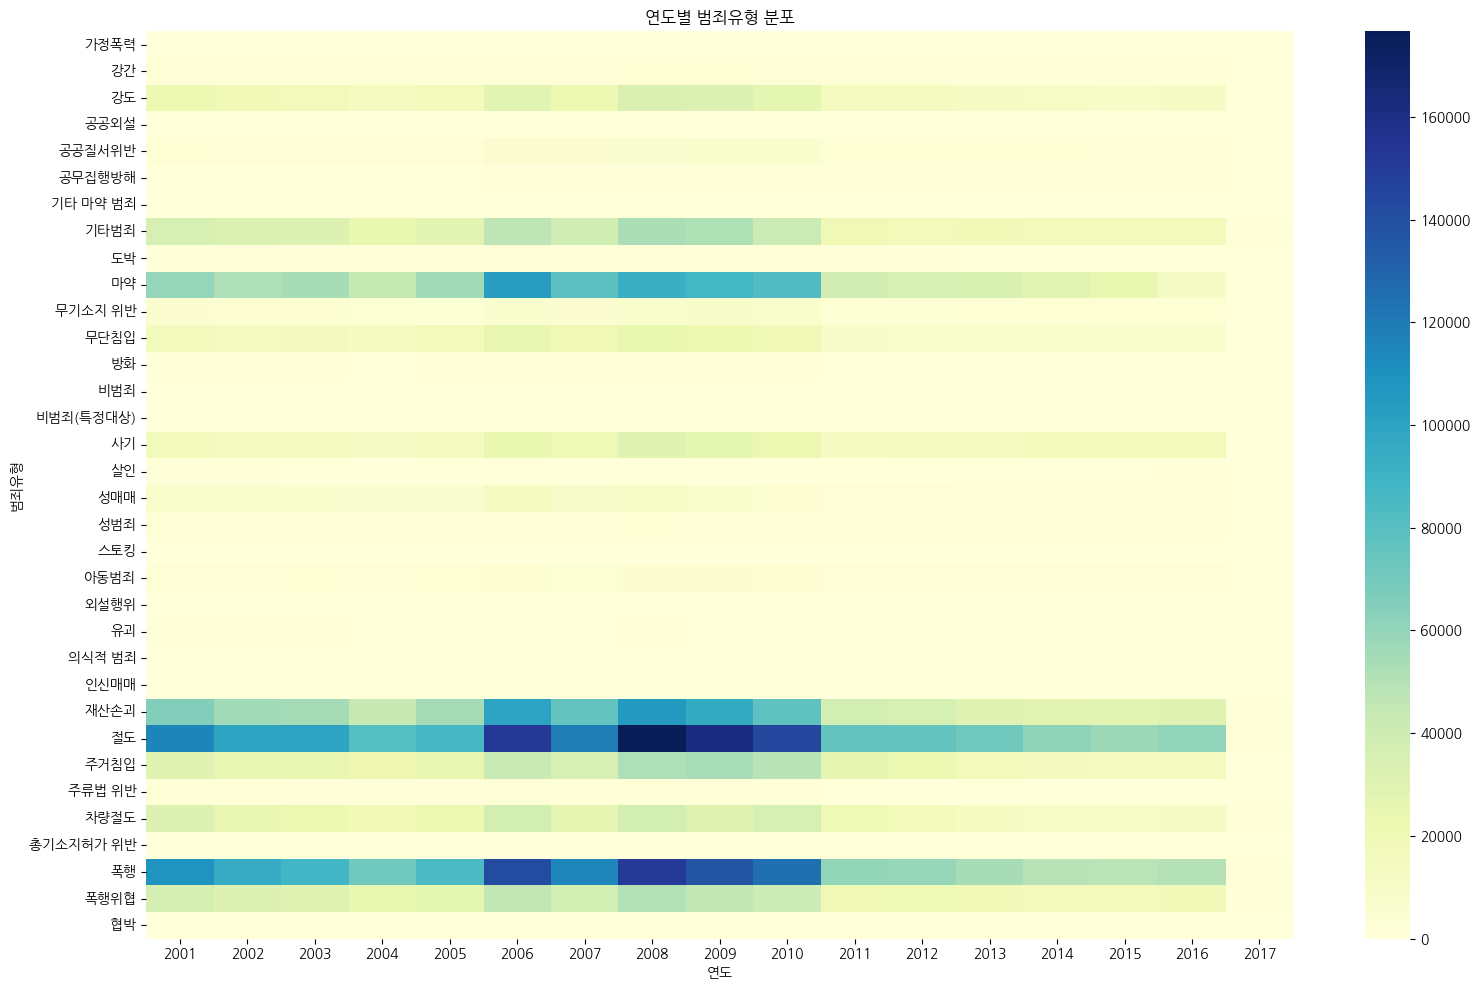

In [ ]:
#시각화
plt.figure(figsize=(16, 10))
sns.heatmap(ct, cmap='YlGnBu')
plt.title('연도별 범죄유형 분포')
plt.xlabel('연도')
plt.ylabel('범죄유형')
plt.tight_layout()
plt.show()

In [ ]:
# 날짜 파싱 → 월(month) 추출

df['Month'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.month

df['범죄한글'] = df['Primary Type'].map(type_translation).fillna('기타')

# 교차표 생성
ct_month = pd.crosstab(df['범죄한글'], df['Month'])

# 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(ct_month)
print("[범죄유형 vs 월(Month)] 카이제곱 검정 결과")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")

# 해석
alpha = 0.05
if p < alpha:
    print("→ 귀무가설 기각: 월별로 범죄유형 분포는 유의미하게 다름")
else:
    print("→ 귀무가설 채택: 월과 범죄유형은 독립적 (관련 없음)")

[범죄유형 vs 월(Month)] 카이제곱 검정 결과
카이제곱 통계량: 40239.19
p-value: 0.0000
자유도: 363
→ 귀무가설 기각: 월별로 범죄유형 분포는 유의미하게 다름


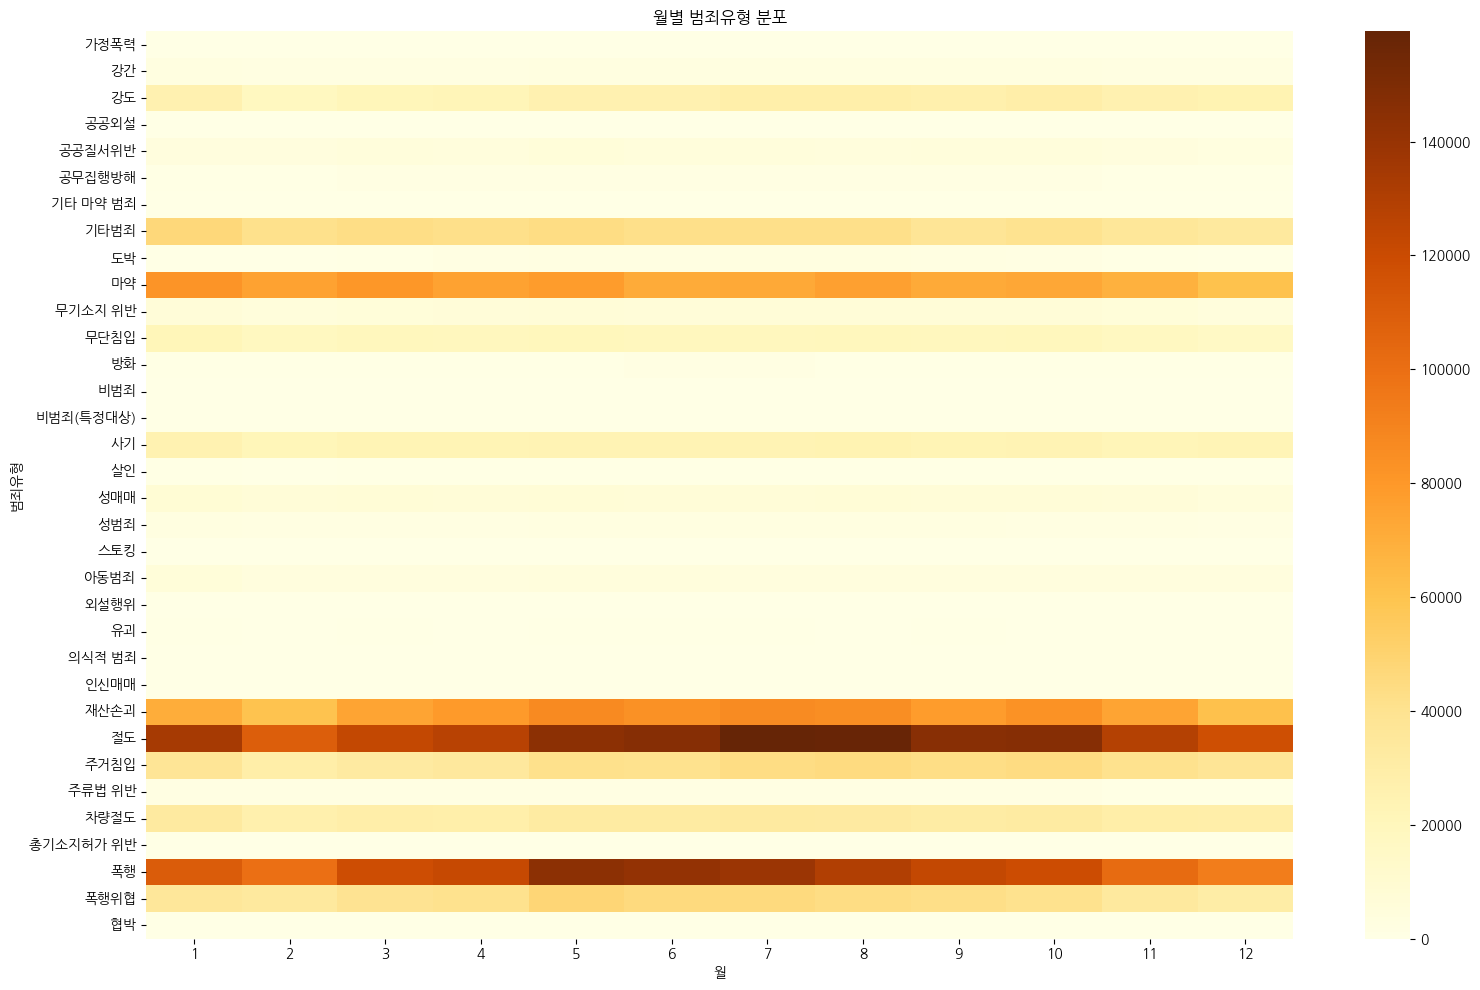

In [ ]:
# 시각화
plt.figure(figsize=(16, 10))
sns.heatmap(ct_month, cmap='YlOrBr')
plt.title('월별 범죄유형 분포')
plt.xlabel('월')
plt.ylabel('범죄유형')
plt.tight_layout()
plt.show()

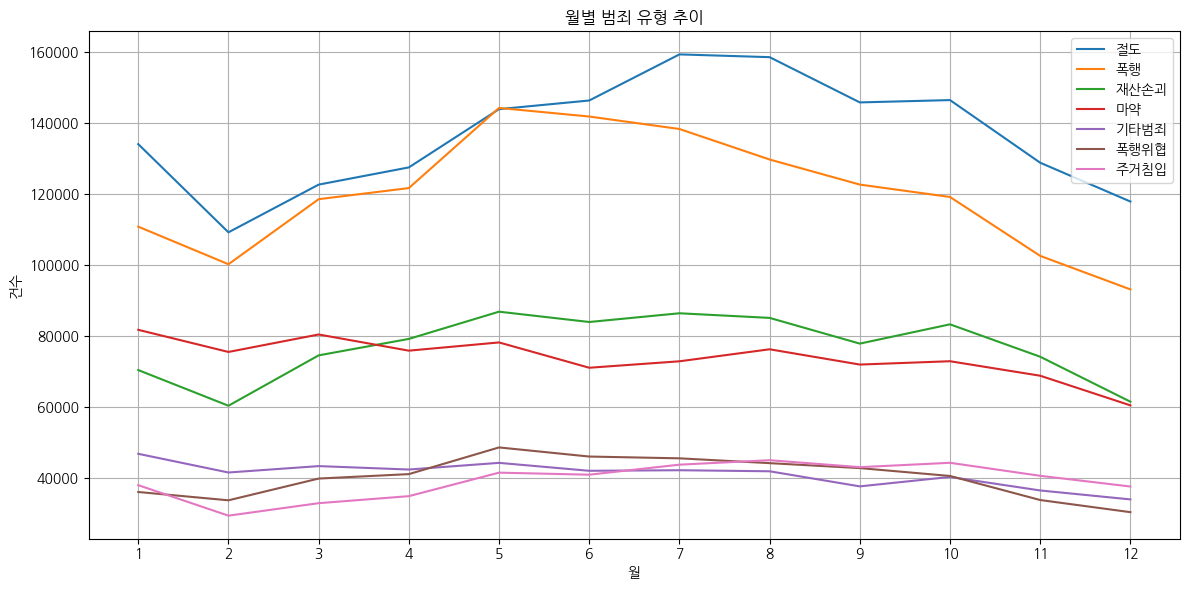

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 월별 범죄유형 건수 집계
monthly_trend = df.groupby(['Month', '범죄한글']).size().reset_index(name='count')

# 2. 피벗 테이블로 변환 → x축: 월 / y축: 건수 / 선: 범죄유형
pivot = monthly_trend.pivot(index='Month', columns='범죄한글', values='count').fillna(0)

# 3. 라인그래프 그리기 (Top 범죄 유형 5~7개 추려서 보기 좋게)
top_crimes = df['범죄한글'].value_counts().nlargest(7).index

plt.figure(figsize=(12, 6))
for crime in top_crimes:
    plt.plot(pivot.index, pivot[crime], label=crime)

plt.title('월별 범죄 유형 추이')
plt.xlabel('월')
plt.ylabel('건수')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [ ]:
# 파생 컬럼 생성
df['Hour'] = df['Date'].dt.hour             # 시간
df['Weekday'] = df['Date'].dt.day_name()    # 요일 (예: Monday)
df['Month'] = df['Date'].dt.month           # 월 (1~12)

In [ ]:
df = df.dropna(subset=['Hour', 'Weekday', 'Month'])

In [ ]:
print(df[['Date', 'Hour', 'Weekday', 'Month']].isna().sum())

Date       0
Hour       0
Weekday    0
Month      0
dtype: int64


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

# 2. 날짜(Date) → datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# 3. 파생 컬럼 생성
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()

# 4. 주말/주중 구분
df['주말구분'] = df['Weekday'].apply(lambda x: '주말' if x in ['Saturday', 'Sunday'] else '주중')

# 5. 요일-시간대별 범죄 발생 수 집계
grouped = df.groupby(['주말구분', 'Hour']).size().reset_index(name='count')

# 6. 결측치 제거
grouped = grouped.dropna()

# 7. 이원 분산분석 (Two-Way ANOVA)
model = smf.ols('count ~ C(주말구분) * C(Hour)', data=grouped).fit()

# 8. ANOVA 결과표 출력
anova_table = sm.stats.anova_lm(model, typ=2)
print("[이원 ANOVA] 주말/주중 × 시간대")
print(anova_table)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


ValueError: array must not contain infs or NaNs

In [ ]:
import numpy as np

# NaN 확인
print("NaN 있는지 확인:")
print(grouped.isna().sum())

# inf 확인
print("\ninf 있는지 확인:")
print(np.isinf(grouped.select_dtypes(include=[float, int])).sum())

NaN 있는지 확인:
주말구분     0
Hour     0
count    0
dtype: int64

inf 있는지 확인:
Hour     0
count    0
dtype: int64


In [ ]:
# 1. Date 변환
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# 2. 파생 컬럼
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df['주말구분'] = df['Weekday'].apply(lambda x: '주말' if x in ['Saturday', 'Sunday'] else '주중')

# 3. 필수 컬럼만 유지하고 결측 제거
df_clean = df.dropna(subset=['Hour', '주말구분'])

# 4. 그룹별 count 계산
grouped = df_clean.groupby(['주말구분', 'Hour']).size().reset_index(name='count')

# 5. 정리된 grouped 확인
print(grouped.head())


  주말구분  Hour   count
0   주말     0  142821
1   주말     1  100859
2   주말     2   91243
3   주말     3   77760
4   주말     4   57153


In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 이원 ANOVA 수행
model = smf.ols('count ~ C(주말구분) * C(Hour)', data=grouped).fit()

# ANOVA 결과표
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


ValueError: array must not contain infs or NaNs

In [ ]:
# 1. Date 변환 및 파생
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df['주말구분'] = df['Weekday'].apply(lambda x: '주말' if x in ['Saturday', 'Sunday'] else '주중')

# 2. 분석에 필요한 열만 정리
df_clean = df.dropna(subset=['Hour', '주말구분'])

# 3. 이원 ANOVA (사건 하나당 1행)
df_clean['발생'] = 1  # 각 사건은 발생 = 1

import statsmodels.formula.api as smf
import statsmodels.api as sm

# 이원 분산분석 수행
model = smf.ols('발생 ~ C(주말구분) * C(Hour)', data=df_clean).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


[카이제곱 독립성 검정] 시간(Hour) vs 주말/주중
카이제곱 통계량: 130759.03
p-value: 0.0000
자유도: 23
→ 귀무가설 기각: 시간대와 주중/주말은 관련 있음


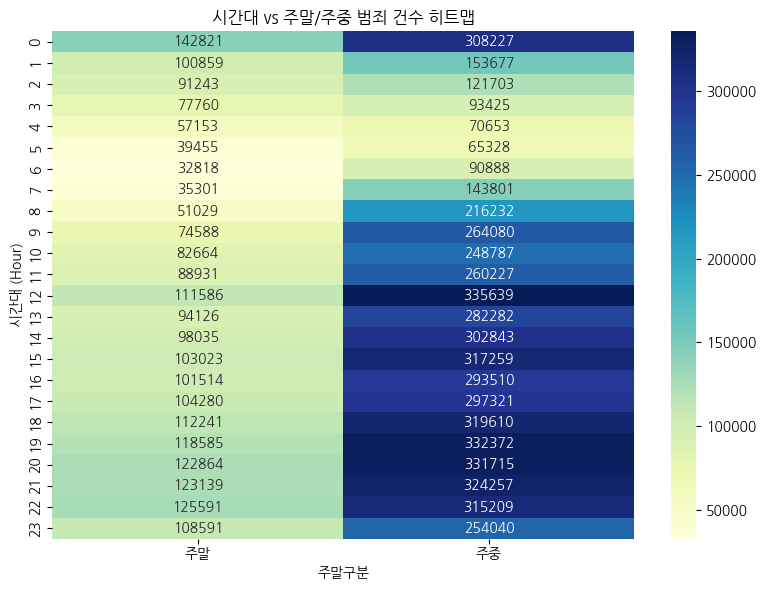

In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Date 파싱 및 파생
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df['Hour'] = df['Date'].dt.hour
df['Weekday'] = df['Date'].dt.day_name()
df['주말구분'] = df['Weekday'].apply(lambda x: '주말' if x in ['Saturday', 'Sunday'] else '주중')

# 2. 교차표 생성
ct = pd.crosstab(df['Hour'], df['주말구분'])

# 3. 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(ct)

# 4. 결과 출력
print("[카이제곱 독립성 검정] 시간(Hour) vs 주말/주중")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
if p < 0.05:
    print("→ 귀무가설 기각: 시간대와 주중/주말은 관련 있음")
else:
    print("→ 귀무가설 채택: 시간대와 주중/주말은 독립적임")

# 5. 시각화 (히트맵)
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('시간대 vs 주말/주중 범죄 건수 히트맵')
plt.xlabel('주말구분')
plt.ylabel('시간대 (Hour)')
plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 한글 매핑 적용
df['범죄한글'] = df['Primary Type'].map(type_translation).fillna('기타')

# 2. 결측값 제거 (Arrest, 범죄한글 기준)
df_clean = df.dropna(subset=['범죄한글', 'Arrest'])

# 3. 교차표 생성 (범죄유형 vs 체포 여부)
ct = pd.crosstab(df_clean['범죄한글'], df_clean['Arrest'])

# 4. 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(ct)

print("[카이제곱 독립성 검정] 범죄유형 vs 체포 여부")
print(f"카이제곱 통계량: {chi2:.2f}")
print(f"p-value: {p:.4f}")
print(f"자유도: {dof}")
if p < 0.05:
    print("→ 귀무가설 기각: 범죄유형에 따라 체포 여부는 통계적으로 다름")
else:
    print("→ 귀무가설 채택: 범죄유형과 체포 여부는 독립적임")

[카이제곱 독립성 검정] 범죄유형 vs 체포 여부
카이제곱 통계량: 3633946.90
p-value: 0.0000
자유도: 33
→ 귀무가설 기각: 범죄유형에 따라 체포 여부는 통계적으로 다름


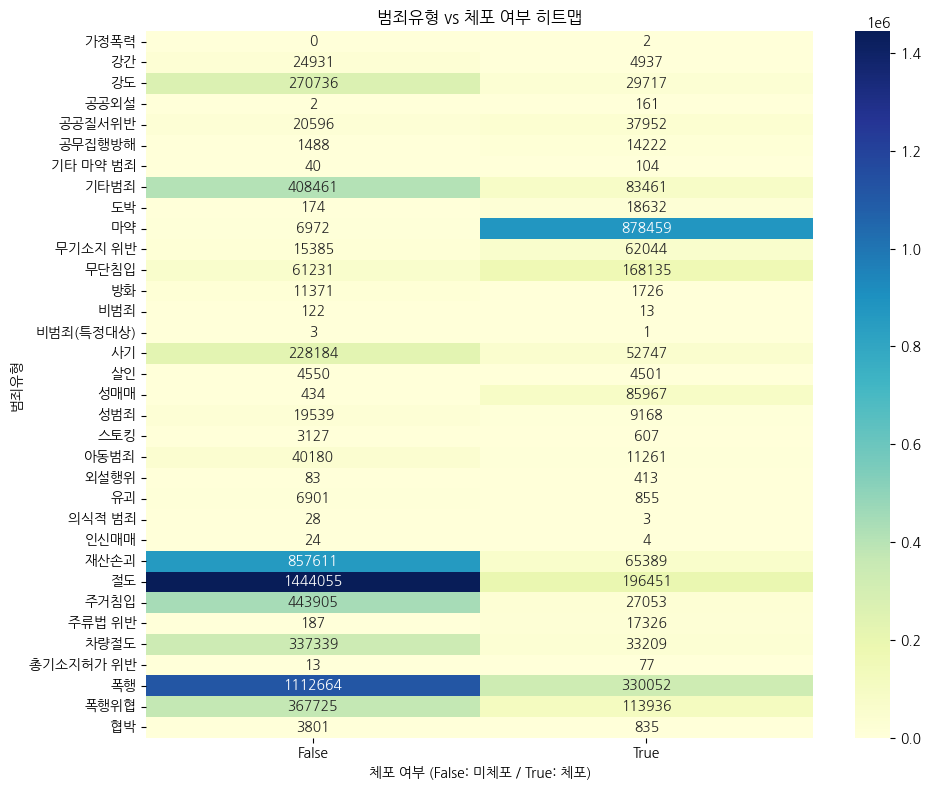

In [ ]:
# 4. 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')
plt.title('범죄유형 vs 체포 여부 히트맵')
plt.xlabel('체포 여부 (False: 미체포 / True: 체포)')
plt.ylabel('범죄유형')
plt.tight_layout()
plt.show()

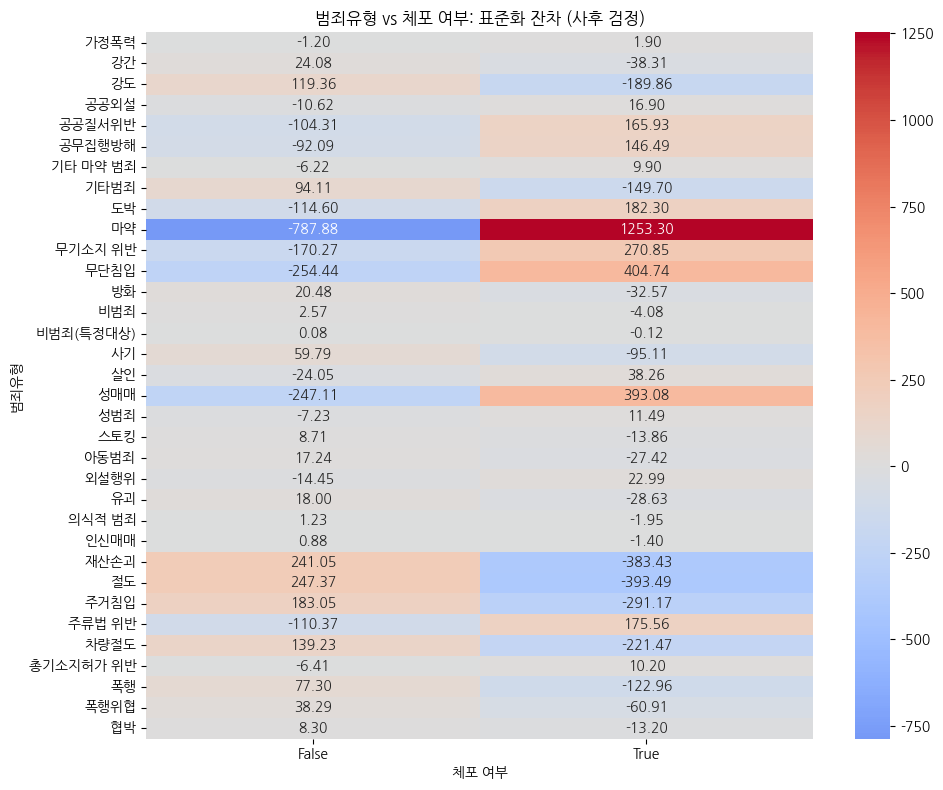

In [ ]:
import numpy as np

# 1. 교차표 (이미 생성됨)
ct = pd.crosstab(df_clean['범죄한글'], df_clean['Arrest'])

# 2. 카이제곱 검정 (기대값 계산 포함)
chi2, p, dof, expected = chi2_contingency(ct)

# 3. 표준화 잔차 계산
residuals = (ct - expected) / np.sqrt(expected)

# 4. 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(residuals, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('범죄유형 vs 체포 여부: 표준화 잔차 (사후 검정)')
plt.xlabel('체포 여부')
plt.ylabel('범죄유형')
plt.tight_layout()
plt.show()


# 범죄유형과 Disctrict 간의 관련성 - 카이제곱 검정

In [ ]:
# 10. 교차표 생성
ct2 = pd.crosstab(df['Primary Type'], df['District'])

# 11. 카이제곱 검정
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(ct2)
print("\n[Primary Type vs 지역]")
print(f"카이제곱 통계량: {chi2_2:.2f}, p-value: {p_2:.4f}, 자유도: {dof_2}")

# 12. 가설 검정
if p_2 < alpha:
    print("→ 귀무가설 기각: 범죄 유형과 지역은 관련 있음")
else:
    print("→ 귀무가설 채택: 범죄 유형과 지역은 관련 없음")


[Primary Type vs 지역]
카이제곱 통계량: 983797.87, p-value: 0.0000, 자유도: 850
→ 귀무가설 기각: 범죄 유형과 지역은 관련 있음


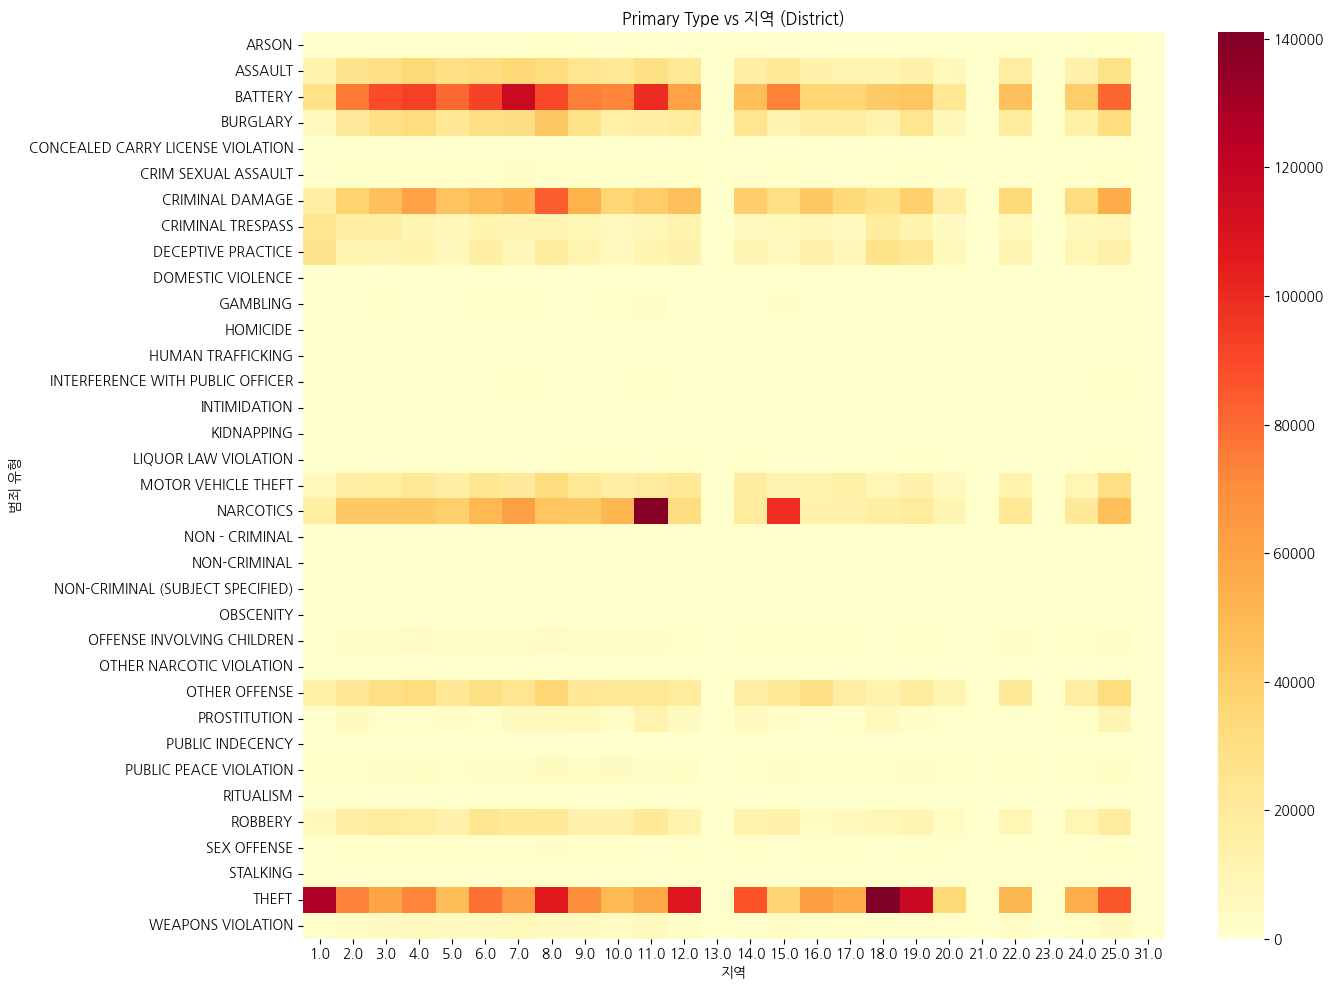

In [ ]:
# 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(ct2, cmap='YlOrRd', cbar=True)
plt.title('Primary Type vs 지역 (District)')
plt.xlabel('지역')
plt.ylabel('범죄 유형')
plt.tight_layout()
plt.show()

# Primary Type과 체포 여부 간 관련성 — 카이제곱 검정

In [ ]:
# 교차표
cross_tab_arrest = pd.crosstab(df_top['Primary Type'], df_top['Arrest'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(cross_tab_arrest)
print("p-value:", p)
if p < 0.05:
    print("→ 범죄 유형과 체포 여부 사이에 유의미한 관련성이 있음")
else:
    print("→ 관련성 없음")

p-value: 0.0
→ 범죄 유형과 체포 여부 사이에 유의미한 관련성이 있음


# 지역(District)별 범죄 유형 분포 — 카이제곱 검정

In [ ]:
# 상위 5개 유형, District 결측 제거
df_geo = df_top.dropna(subset=['District'])

# 교차표
cross_tab_district = pd.crosstab(df_geo['District'], df_geo['Primary Type'])

# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(cross_tab_district)
print("p-value:", p)
if p < 0.05:
    print("→ 지역에 따라 범죄 유형 분포가 유의미하게 다름")
else:
    print("→ 지역에 따른 차이 없음")

p-value: 0.0
→ 지역에 따라 범죄 유형 분포가 유의미하게 다름


# 교차표 시각화

In [ ]:
# 한글화
!pip install koreanize-matplotlib
import koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 62.3 MB/s eta 0:00:00


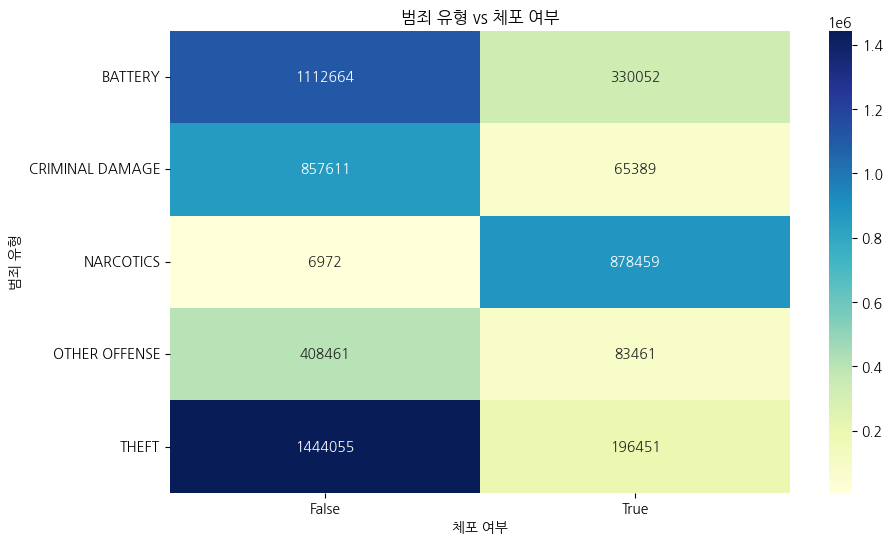

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab_arrest, annot=True, fmt='d', cmap='YlGnBu')
plt.title("범죄 유형 vs 체포 여부")
plt.ylabel("범죄 유형")
plt.xlabel("체포 여부")
plt.show()

# 푸아송 분포: 하루 단위 사건 수 분석
목표:
 - 하루 단위 사건 수를 집계하고, 평균과 분산을 확인하여 푸아송 분포 가정(평균≈분산)을 검증
 - 이 값을 기반으로 Poisson 모델을 활용한 예측 가능성 평가

하루 평균 사건 수: 1354.7052200614125
하루 사건 분산: 381356.5140113068


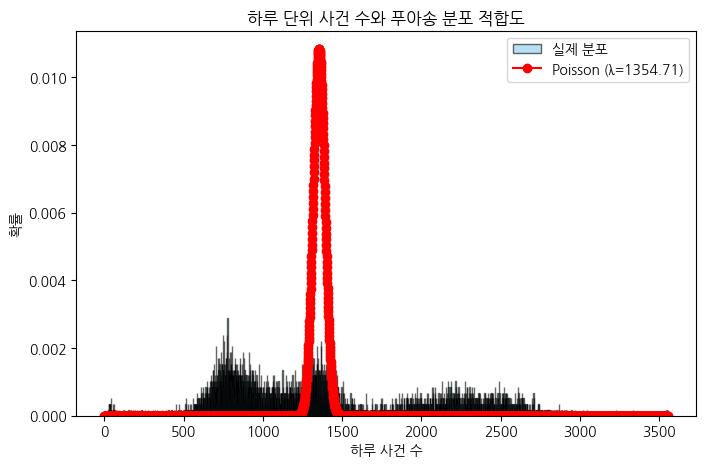

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# 날짜만 추출하여 집계 (하루 단위 사건 수)
df['Date_only'] = df['Date'].dt.date
daily_counts = df.groupby('Date_only').size()

# 평균과 분산 확인
mean_count = daily_counts.mean()
var_count = daily_counts.var()
print("하루 평균 사건 수:", mean_count)
print("하루 사건 분산:", var_count)

# 히스토그램과 이론적 푸아송 분포 오버레이
x = np.arange(0, daily_counts.max() + 1)
poisson_pmf = poisson.pmf(x, mu=mean_count)

plt.figure(figsize=(8, 5))
plt.hist(daily_counts, bins=range(0, daily_counts.max() + 2), density=True, alpha=0.6, color='skyblue', edgecolor='black', label='실제 분포')
plt.plot(x, poisson_pmf, 'ro-', label=f'Poisson (λ={mean_count:.2f})')
plt.xlabel("하루 사건 수")
plt.ylabel("확률")
plt.title("하루 단위 사건 수와 푸아송 분포 적합도")
plt.legend()
plt.show()


### 데이터가 포아송분포를 따르지 않는다.

# 지수 분포: 사건 간 시간 간격 분석
 목표:

- 사건이 발생한 시점 순으로 정렬한 후, 인접 사건 간 시간 차이를 구해서 히스토그램과 커널 밀도 추정을 통해 지수 분포 형태를 확인

- 만약 사건이 랜덤하게 발생한다면, 시간 간격이 지수 분포에 가까울 것으로 예상

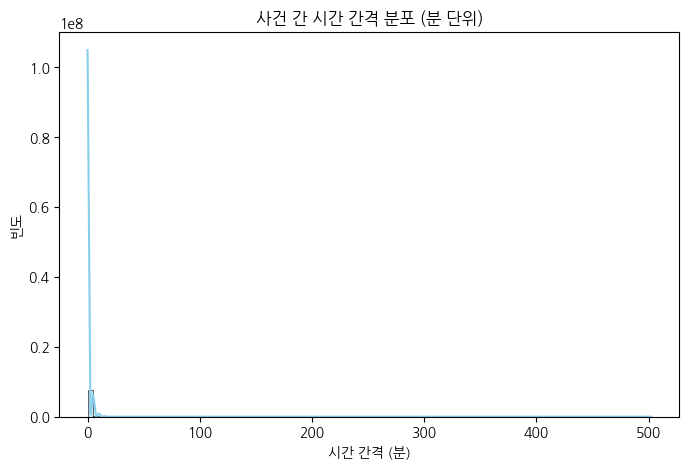

In [ ]:
import seaborn as sns

#시간 정렬 및 시간 차 계산 (분 단위)
df_sorted = df.sort_values(by="Date")
df_sorted["Time_Diff_Min"] = df_sorted["Date"].diff().dt.total_seconds() / 60  # 분 단위

# 결측 제거
time_gaps = df_sorted["Time_Diff_Min"].dropna()
time_gaps = time_gaps[time_gaps < 1000]  # 극단값 제외하면 분포 확인이 더 잘됨

# 지수 분포 시각화
plt.figure(figsize=(8, 5))
sns.histplot(time_gaps, bins=100, kde=True, color='skyblue')
plt.title("사건 간 시간 간격 분포 (분 단위)")
plt.xlabel("시간 간격 (분)")
plt.ylabel("빈도")
plt.show()

# 베이불 분포: 사건 간 시간 간격에 대한 베이불 적합
목표:

- 사건 간 시간 간격 데이터에 베이불 분포를 적합시키고,
- 적합된 파라미터(특히 shape 파라미터
𝑘)를 통해 시간이 지날수록 발생률이 증가하는지(𝑘>1), 감소하는지(𝑘<1)를 확인

베이불 분포 적합 파라미터 (shape, loc, scale): 0.08969123973097218 0 6.132842814690058e-18


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:2581: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


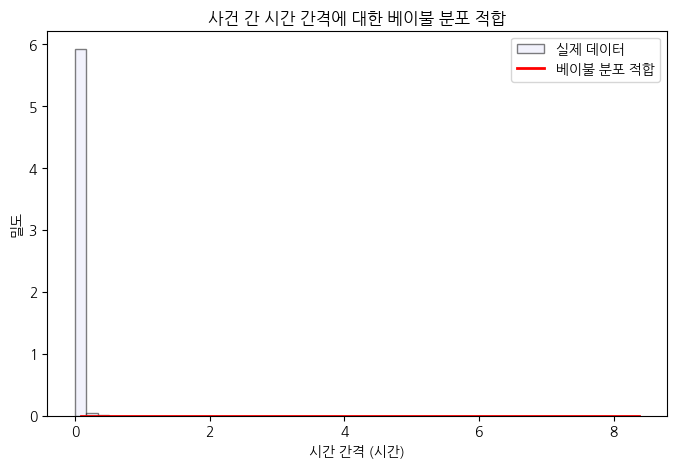

In [ ]:
from scipy.stats import weibull_min

# 베이불 분포 적합 (위치(loc)를 0으로 고정)
time_gaps = time_diffs.values
c, loc, scale = weibull_min.fit(time_gaps, floc=0)
print("베이불 분포 적합 파라미터 (shape, loc, scale):", c, loc, scale)

# x 범위 설정 및 베이불 분포 PDF 계산
x = np.linspace(0, time_gaps.max(), 100)
weibull_pdf = weibull_min.pdf(x, c, loc, scale)

plt.figure(figsize=(8, 5))
plt.hist(time_gaps, bins=50, density=True, alpha=0.5, color='lavender', edgecolor='black', label='실제 데이터')
plt.plot(x, weibull_pdf, 'r-', lw=2, label='베이불 분포 적합')
plt.xlabel("시간 간격 (시간)")
plt.ylabel("밀도")
plt.title("사건 간 시간 간격에 대한 베이불 분포 적합")
plt.legend()
plt.show()

# 절도 사건만 추출하여 포아송 분포 확인

In [ ]:
# 절도(THEFT) 사건만 필터링
df_theft = df[df["Primary Type"] == "THEFT"]

# 날짜만 추출해서 일별 사건 수 집계
df_theft["Date_only"] = df_theft["Date"].dt.date
daily_theft_counts = df_theft.groupby("Date_only").size()

# 평균, 분산 확인
lambda_theft = daily_theft_counts.mean()
variance_theft = daily_theft_counts.var()
print("절도 하루 평균 사건 수 (λ):", lambda_theft)
print("절도 하루 사건 수 분산:", variance_theft)

절도 하루 평균 사건 수 (λ): 279.85431593312865
절도 하루 사건 수 분산: 15558.467426344776


<ipython-input-18-219d44213d41>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theft["Date_only"] = df_theft["Date"].dt.date


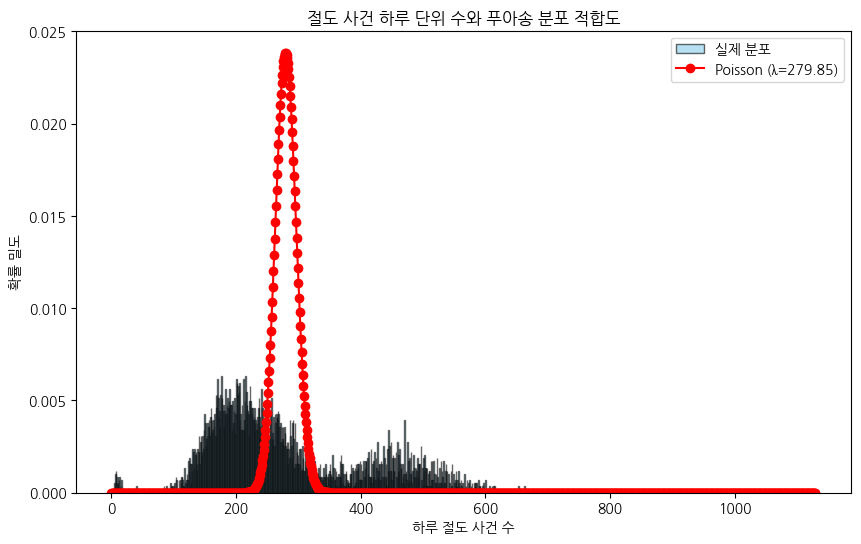

In [ ]:
from scipy.stats import poisson

# 이론적 푸아송 분포 만들기
x = np.arange(0, daily_theft_counts.max() + 1)
poisson_pmf = poisson.pmf(x, mu=lambda_theft)

# 시각화
plt.figure(figsize=(10, 6))
plt.hist(daily_theft_counts, bins=range(0, daily_theft_counts.max() + 2),
         density=True, alpha=0.6, color='skyblue', edgecolor='black', label="실제 분포")
plt.plot(x, poisson_pmf, 'ro-', label=f'Poisson (λ={lambda_theft:.2f})')
plt.xlabel("하루 절도 사건 수")
plt.ylabel("확률 밀도")
plt.title("절도 사건 하루 단위 수와 푸아송 분포 적합도")
plt.legend()
plt.show()

In [ ]:
# 절도 사건만 필터링
df_theft = df[df["Primary Type"] == "THEFT"]

# 시간순 정렬
df_theft_sorted = df_theft.sort_values(by="Date")

# 사건 간 시간 차이 계산 (분 단위로)
df_theft_sorted["Time_Diff_Min"] = df_theft_sorted["Date"].diff().dt.total_seconds() / 60

# 첫 행은 NaN이므로 제외하고 평균 계산
mean_diff = df_theft_sorted["Time_Diff_Min"].dropna().mean()
print(f"절도 사건 간 평균 시간 간격: {mean_diff:.2f}분")

절도 사건 간 평균 시간 간격: 5.15분


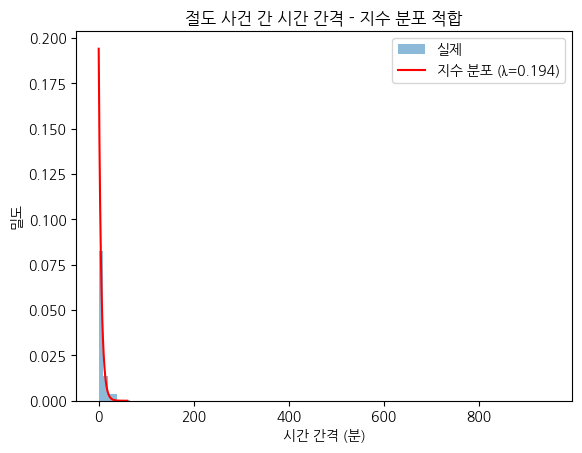

In [ ]:
from scipy.stats import expon
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 60, 200)
lambda_hat = 1 / 5.15
pdf = expon.pdf(x, scale=1/lambda_hat)

plt.hist(df_theft_sorted["Time_Diff_Min"].dropna(), bins=100, density=True, alpha=0.5, label="실제")
plt.plot(x, pdf, 'r-', label=f"지수 분포 (λ={lambda_hat:.3f})")
plt.xlabel("시간 간격 (분)")
plt.ylabel("밀도")
plt.title("절도 사건 간 시간 간격 - 지수 분포 적합")
plt.legend()
plt.show()

베이불 분포 파라미터: shape(k)=0.036, scale=0.00


/usr/local/lib/python3.11/dist-packages/scipy/stats/_continuous_distns.py:2581: RuntimeWarning: divide by zero encountered in power
  return c*pow(x, c-1)*np.exp(-pow(x, c))


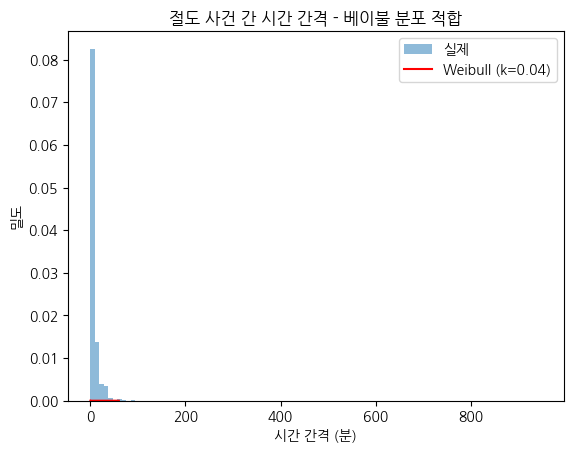

In [ ]:
from scipy.stats import weibull_min

time_gaps = df_theft_sorted["Time_Diff_Min"].dropna()
c, loc, scale = weibull_min.fit(time_gaps, floc=0)
print(f"베이불 분포 파라미터: shape(k)={c:.3f}, scale={scale:.2f}")

x = np.linspace(0, 60, 200)
pdf = weibull_min.pdf(x, c, loc, scale)

plt.hist(time_gaps, bins=100, density=True, alpha=0.5, label="실제")
plt.plot(x, pdf, 'r-', label=f"Weibull (k={c:.2f})")
plt.xlabel("시간 간격 (분)")
plt.ylabel("밀도")
plt.title("절도 사건 간 시간 간격 - 베이불 분포 적합")
plt.legend()
plt.show()


In [ ]:
# 절도 사건만 추출 + District 결측 제거
df_theft = df[df["Primary Type"] == "THEFT"].dropna(subset=["District"])

# District를 int로 정리 (혹시 float이면)
df_theft["District"] = df_theft["District"].astype(int)

# 결과 저장용 리스트
district_gaps = []

# 각 District마다 반복
for district, group in df_theft.groupby("District"):
    group_sorted = group.sort_values(by="Date")
    time_diff = group_sorted["Date"].diff().dt.total_seconds() / 60  # 분 단위
    mean_gap = time_diff.dropna().mean()
    district_gaps.append((district, mean_gap))

# 데이터프레임으로 정리
gap_df = pd.DataFrame(district_gaps, columns=["District", "Mean_Gap_Min"]).sort_values("Mean_Gap_Min")

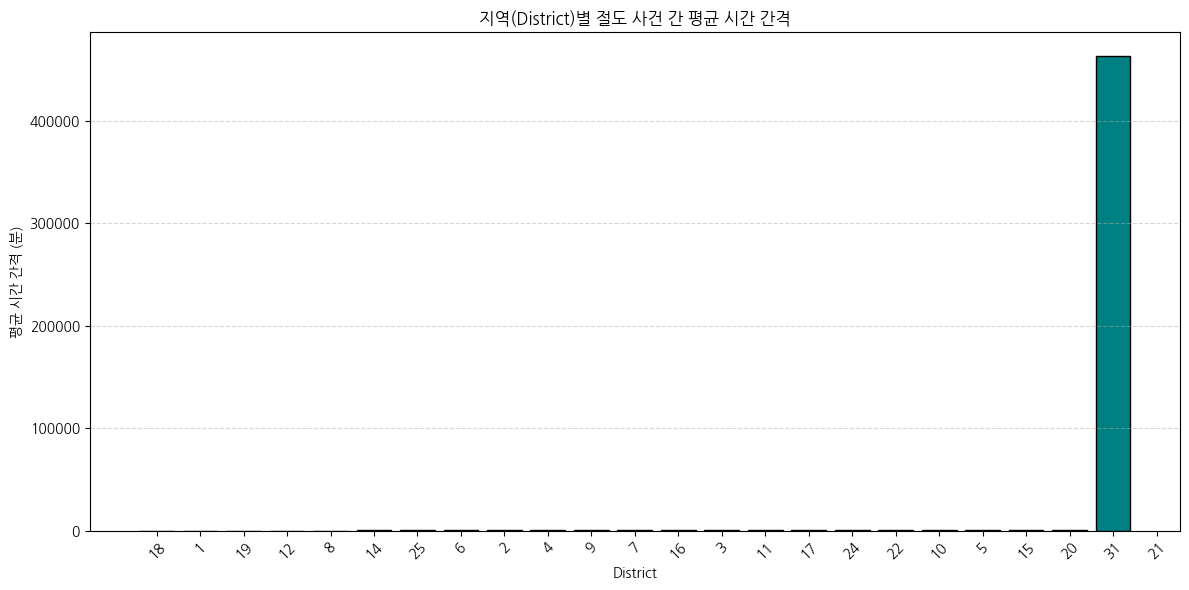

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(gap_df["District"].astype(str), gap_df["Mean_Gap_Min"], color='teal', edgecolor='black')
plt.title("지역(District)별 절도 사건 간 평균 시간 간격")
plt.xlabel("District")
plt.ylabel("평균 시간 간격 (분)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
count_31 = df_theft[df_theft["District"] == 31].shape[0]
print(f"District 31 내 절도 사건 수: {count_31}건")

df_theft_31 = df_theft[df_theft["District"] == 31]
print(df_theft_31["Date"].min(), "~", df_theft_31["Date"].max())

import folium

map_center = [df_theft_31["Latitude"].mean(), df_theft_31["Longitude"].mean()]
m = folium.Map(location=map_center, zoom_start=12)

for _, row in df_theft_31.sample(min(100, len(df_theft_31))).iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,
        color='blue',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)

m


District 31 내 절도 사건 수: 16건
2003-07-24 12:00:00 ~ 2016-10-08 01:05:00


In [ ]:
# 평균 시간 간격 상위 5개 지역 출력
gap_df.sort_values("Mean_Gap_Min", ascending=False).head()

,District,Mean_Gap_Min
24,31,463156.333333
18,20,243.897477
13,15,227.238734
4,5,174.159012
9,10,169.776540


In [ ]:
sorted(df['Primary Type'].unique())

['ARSON',
 'ASSAULT',
 'BATTERY',
 'BURGLARY',
 'CONCEALED CARRY LICENSE VIOLATION',
 'CRIM SEXUAL ASSAULT',
 'CRIMINAL DAMAGE',
 'CRIMINAL TRESPASS',
 'DECEPTIVE PRACTICE',
 'DOMESTIC VIOLENCE',
 'GAMBLING',
 'HOMICIDE',
 'HUMAN TRAFFICKING',
 'INTERFERENCE WITH PUBLIC OFFICER',
 'INTIMIDATION',
 'KIDNAPPING',
 'LIQUOR LAW VIOLATION',
 'MOTOR VEHICLE THEFT',
 'NARCOTICS',
 'NON - CRIMINAL',
 'NON-CRIMINAL',
 'NON-CRIMINAL (SUBJECT SPECIFIED)',
 'OBSCENITY',
 'OFFENSE INVOLVING CHILDREN',
 'OTHER NARCOTIC VIOLATION',
 'OTHER OFFENSE',
 'PROSTITUTION',
 'PUBLIC INDECENCY',
 'PUBLIC PEACE VIOLATION',
 'RITUALISM',
 'ROBBERY',
 'SEX OFFENSE',
 'STALKING',
 'THEFT',
 'WEAPONS VIOLATION']

In [ ]:
df["Location Description"].unique()

array(['RESIDENCE', 'OTHER', 'APARTMENT', 'RESIDENCE PORCH/HALLWAY',
       'GAS STATION', 'COMMERCIAL / BUSINESS OFFICE', 'STREET', 'BANK',
       'SMALL RETAIL STORE', 'DEPARTMENT STORE', 'SIDEWALK',
       'APPLIANCE STORE', 'HOTEL/MOTEL', 'MEDICAL/DENTAL OFFICE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY',
       'CHURCH/SYNAGOGUE/PLACE OF WORSHIP', 'DAY CARE CENTER',
       'RESTAURANT', 'COLLEGE/UNIVERSITY GROUNDS',
       'SCHOOL, PUBLIC, BUILDING', 'HOSPITAL BUILDING/GROUNDS',
       'WAREHOUSE', 'FACTORY/MANUFACTURING BUILDING',
       'SCHOOL, PRIVATE, GROUNDS', 'GROCERY FOOD STORE', 'CHA APARTMENT',
       'SCHOOL, PUBLIC, GROUNDS', 'VEHICLE NON-COMMERCIAL',
       'GOVERNMENT BUILDING/PROPERTY', 'AIRPORT/AIRCRAFT',
       'ATM (AUTOMATIC TELLER MACHINE)', 'VACANT LOT/LAND',
       'POLICE FACILITY/VEH PARKING LOT', 'TAVERN/LIQUOR STORE',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'RESIDENCE-GARAGE',
       'PARK PROPERTY', 'CHA PARKING LOT/GROUNDS', 'ABANDONED BUILDING'

In [ ]:
type_translation = {
    'ARSON': '방화',
    'ASSAULT': '폭행위협',
    'BATTERY': '폭행',
    'BURGLARY': '주거침입',
    'CONCEALED CARRY LICENSE VIOLATION': '총기소지허가 위반',
    'CRIM SEXUAL ASSAULT': '강간',
    'CRIMINAL DAMAGE': '재산손괴',
    'CRIMINAL TRESPASS': '무단침입',
    'DECEPTIVE PRACTICE': '사기',
    'DOMESTIC VIOLENCE': '가정폭력',
    'GAMBLING': '도박',
    'HOMICIDE': '살인',
    'HUMAN TRAFFICKING': '인신매매',
    'INTERFERENCE WITH PUBLIC OFFICER': '공무집행방해',
    'INTIMIDATION': '협박',
    'KIDNAPPING': '유괴',
    'LIQUOR LAW VIOLATION': '주류법 위반',
    'MOTOR VEHICLE THEFT': '차량절도',
    'NARCOTICS': '마약',
    'NON - CRIMINAL': '비범죄',
    'NON-CRIMINAL': '비범죄',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': '비범죄(특정대상)',
    'OBSCENITY': '외설행위',
    'OFFENSE INVOLVING CHILDREN': '아동범죄',
    'OTHER NARCOTIC VIOLATION': '기타 마약 범죄',
    'OTHER OFFENSE': '기타범죄',
    'PROSTITUTION': '성매매',
    'PUBLIC INDECENCY': '공공외설',
    'PUBLIC PEACE VIOLATION': '공공질서위반',
    'RITUALISM': '의식적 범죄',
    'ROBBERY': '강도',
    'SEX OFFENSE': '성범죄',
    'STALKING': '스토킹',
    'THEFT': '절도',
    'WEAPONS VIOLATION': '무기소지 위반'
}


In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from joblib import Parallel, delayed

#  데이터 전처리
df['Date'] = pd.to_datetime(df['Date'])
df.dropna(subset=['X Coordinate', 'Y Coordinate'], inplace=True)

#  각 Beat에서 가장 빈번한 상위 3가지 범죄 선정
top3_crimes_by_beat = (
    df.groupby(['Beat', 'Primary Type']).size()
    .reset_index(name='Count')
    .sort_values(['Beat', 'Count'], ascending=[True, False])
    .groupby('Beat').head(3)
)

# 주요 범죄 데이터만 필터링
filtered_df = df.merge(top3_crimes_by_beat[['Beat', 'Primary Type']], on=['Beat', 'Primary Type'], how='inner').reset_index()

# BallTree 기반 공간 검색 준비 (X/Y 좌표 사용)
coordinates = df[['X Coordinate', 'Y Coordinate']].values
tree = BallTree(coordinates, metric='euclidean')

# 빠른 공간 검색 함수 정의 (X/Y 기반)
def fast_crimes_after_event(tree, df, base_idx, days_interval, radius=100):
    base_date = df.loc[base_idx, 'Date']
    max_date = base_date + pd.Timedelta(days=days_interval)

    base_point = coordinates[base_idx].reshape(1, -1)

    date_mask = (df['Date'] > base_date) & (df['Date'] <= max_date)
    indices_within_radius = tree.query_radius(base_point, r=radius)[0]

    final_indices = indices_within_radius[date_mask.iloc[indices_within_radius].values]

    return df.iloc[final_indices]

# 병렬처리를 이용한 분석 수행
def analyze_crime_event(tree, df, idx):
    crime_row = df.iloc[idx]
    crimes_1day = fast_crimes_after_event(tree, df, idx, 1)
    crimes_7day = fast_crimes_after_event(tree, df, idx, 7)
    crimes_30day = fast_crimes_after_event(tree, df, idx, 30)

    return {
        'Beat': crime_row['Beat'],
        'Primary Type': crime_row['Primary Type'],
        'Crime Date': crime_row['Date'],
        '1day_count': len(crimes_1day),
        '7day_count': len(crimes_7day),
        '30day_count': len(crimes_30day),
        '1day_location_desc': crimes_1day['Location Description'].value_counts().to_dict(),
        '7day_location_desc': crimes_7day['Location Description'].value_counts().to_dict(),
        '30day_location_desc': crimes_30day['Location Description'].value_counts().to_dict(),
    }

# 병렬 처리 실행
results = Parallel(n_jobs=-1, backend='multiprocessing')(
    delayed(analyze_crime_event)(tree, df, idx) for idx in filtered_df.index
)

# 결과를 데이터프레임으로 정리
results_df = pd.DataFrame(results)

# 결과 저장
results_df.to_csv('crime_eda_results.csv', index=False)

# 결과 확인
print(results_df.head())


<ipython-input-2-a86292794133>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
Process ForkPoolWorker-3:
Process ForkPoolWorker-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/usr/lib/python3.11/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    task = get()
           ^^^^^
  File "/usr/lib/python3.11/multiprocessing/pool.py", line 114, in worker
    

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    min_dim = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * min_dim))


In [ ]:
# 날짜 → datetime 변환
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# 파생 변수
df['Hour'] = df['Date'].dt.hour
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# 시간대 범주화
def get_time_period(hour):
    if pd.isnull(hour): return None
    if 0 <= hour < 6: return '새벽'
    elif 6 <= hour < 12: return '오전'
    elif 12 <= hour < 18: return '오후'
    else: return '저녁'

df['TimePeriod'] = df['Hour'].apply(get_time_period)

# Primary Type → 한글 매핑
type_translation = {
    'ARSON': '방화', 'ASSAULT': '폭행위협', 'BATTERY': '폭행',
    'BURGLARY': '주거침입', 'CRIM SEXUAL ASSAULT': '강간',
    'CRIMINAL DAMAGE': '재산손괴', 'CRIMINAL TRESPASS': '무단침입',
    'DECEPTIVE PRACTICE': '사기', 'DOMESTIC VIOLENCE': '가정폭력',
    'GAMBLING': '도박', 'HOMICIDE': '살인', 'HUMAN TRAFFICKING': '인신매매',
    'INTERFERENCE WITH PUBLIC OFFICER': '공무집행방해', 'INTIMIDATION': '협박',
    'KIDNAPPING': '유괴', 'LIQUOR LAW VIOLATION': '주류법 위반',
    'MOTOR VEHICLE THEFT': '차량절도', 'NARCOTICS': '마약',
    'NON - CRIMINAL': '비범죄', 'NON-CRIMINAL': '비범죄',
    'NON-CRIMINAL (SUBJECT SPECIFIED)': '비범죄(특정대상)', 'OBSCENITY': '외설행위',
    'OFFENSE INVOLVING CHILDREN': '아동범죄', 'OTHER NARCOTIC VIOLATION': '기타 마약 범죄',
    'OTHER OFFENSE': '기타범죄', 'PROSTITUTION': '성매매', 'PUBLIC INDECENCY': '공공외설',
    'PUBLIC PEACE VIOLATION': '공공질서위반', 'RITUALISM': '의식적 범죄',
    'ROBBERY': '강도', 'SEX OFFENSE': '성범죄', 'STALKING': '스토킹',
    'THEFT': '절도', 'WEAPONS VIOLATION': '무기소지 위반'
}
df['범죄한글'] = df['Primary Type'].map(type_translation).fillna('기타')


In [ ]:
# 결측치 제거
df_clean = df.dropna(subset=['범죄한글', 'TimePeriod', 'Month', 'Year'])

# 1. 시간대 vs 범죄유형
ct1 = pd.crosstab(df_clean['범죄한글'], df_clean['TimePeriod'])
v1 = cramers_v(ct1)

# 2. 월 vs 범죄유형
ct2 = pd.crosstab(df_clean['범죄한글'], df_clean['Month'])
v2 = cramers_v(ct2)

# 3. 연도 vs 범죄유형
ct3 = pd.crosstab(df_clean['범죄한글'], df_clean['Year'])
v3 = cramers_v(ct3)

# 결과 출력
print("Cramér's V 비교:")
print(f"시간대 vs 범죄유형: {v1:.4f}")
print(f"월     vs 범죄유형: {v2:.4f}")
print(f"연도   vs 범죄유형: {v3:.4f}")


Cramér's V 비교:
시간대 vs 범죄유형: 0.1295
월     vs 범죄유형: 0.0215
연도   vs 범죄유형: 0.0277
